In [112]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots we will create



# read in the data

df = pd.read_csv(r'C:\Users\adria\OneDrive\Área de Trabalho\PROJETOS\Projetos para o Portfolio\correlation_python\movies.csv')

In [114]:
# let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [115]:
# Data types of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [116]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [117]:
# Checking for missing and infinite values in a dataframe


# checking for NaN values
print(df['budget'].isna().sum())
print(df['gross'].isna().sum())

# Checking for infinite values
print(np.isinf(df['budget']).sum())
print(np.isinf(df['gross']).sum())


2171
189
0
0


In [118]:
# Replacing NaN and infinite values in 'budget' and 'gross' columns

df['budget'] = df['budget'].replace([np.inf, -np.inf, np.nan], 0)
df['gross'] = df['gross'].replace([np.inf, -np.inf, np.nan], 0)

In [119]:
# Converting 'budget' and 'gross' 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [120]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [121]:
# Define a function to extract the desired string part from the 'released' column

def extract_string(date_str):
    if isinstance(date_str, str):
        try:
            start_index = date_str.find(' (')
            if start_index != -1:
                return date_str[:start_index]
            return date_str
        except ValueError:
            return None
    return None

# Define a function to extract the year from the date string
def extract_year(date_str):
    try:
        date = pd.to_datetime(date_str, format='%B %d, %Y')
        return date.year
    except ValueError:
        return None

df['string_value'] = df['released'].apply(extract_string)
df['correctyear'] = df['string_value'].apply(lambda x: extract_year(x) if pd.notnull(x) else None)
df['correctyear'] = df['correctyear'].replace(np.nan, -1)
df['correctyear'] = df['correctyear'].astype(int)

df['year'] = df['correctyear']

df.drop('correctyear', axis=1, inplace=True)  
df.drop('string_value', axis=1, inplace=True)


df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [122]:
# Sorting dataFrame by gross: descending order

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [123]:
# Setting display option for maximum rows 

pd.set_option('display.max_rows', None)

In [124]:
# Sorting dataFrame by gross in descending order and adjusting display option

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<Axes: >

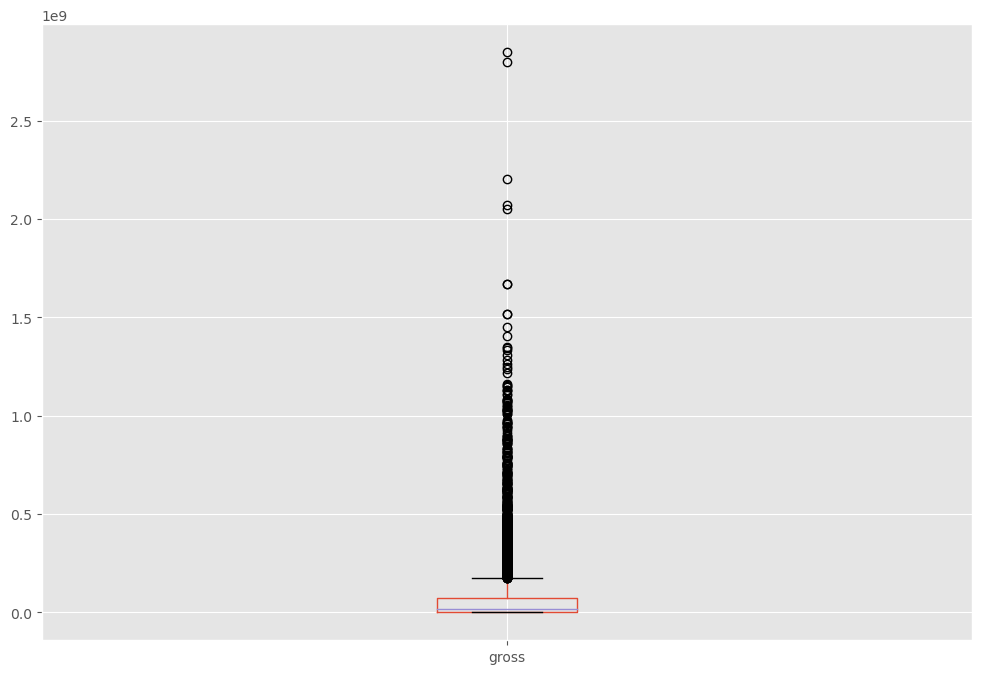

In [125]:
# Detecting Outliers

df.boxplot(column=['gross'])

In [19]:
# df.drop_duplicates() 



In [126]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
#Correlation


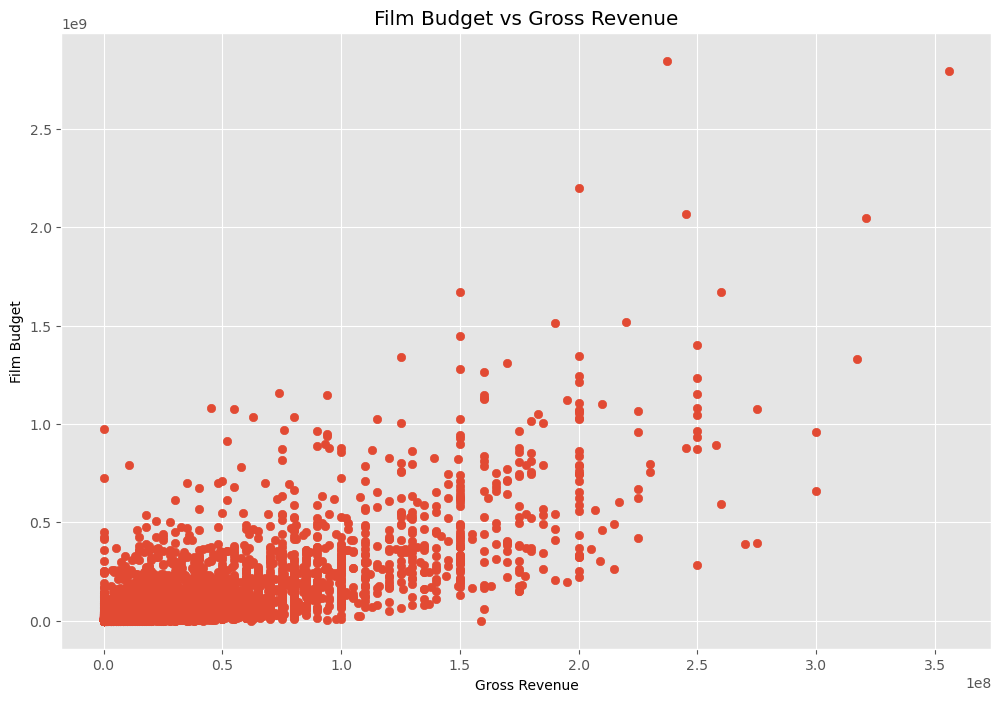

In [127]:
# Scatter plot with budget and gross

# Filter rows with non-null values in 'budget' and 'gross'
filtered_df = df.dropna(subset=['budget', 'gross'])

# Create the scatter plot
plt.scatter(x=filtered_df['budget'], y=filtered_df['gross'])
plt.xlabel('Gross Revenue')
plt.ylabel('Film Budget')
plt.title('Film Budget vs Gross Revenue')
plt.show()

In [128]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


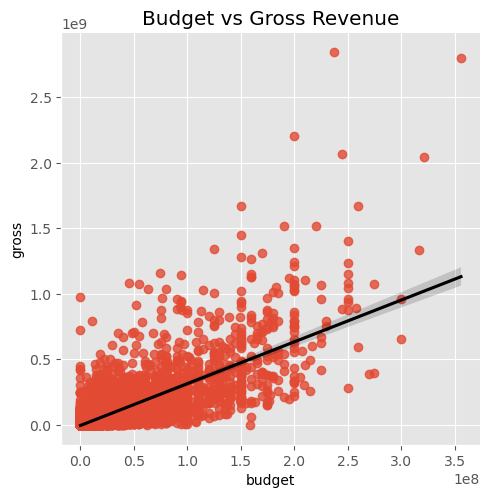

In [129]:
# Plot budget vs gross earnings

# Filter rows with non-null values in 'budget' and 'gross'
filtered_df = df.dropna(subset=['budget', 'gross'])

# Create scatter plot with linear regression line and custom line color
sns.lmplot(x='budget', y='gross', data=filtered_df, line_kws={'color': 'black'})

plt.title('Budget vs Gross Revenue')

# Display the plot
plt.show()

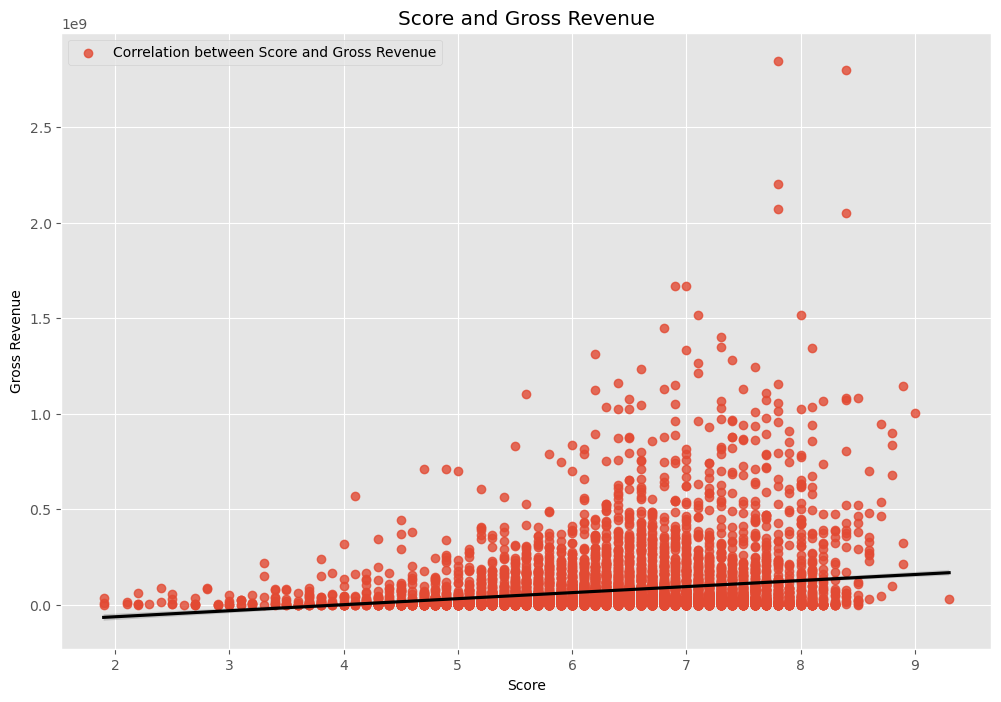

In [130]:
# Correlation between Score and Gross Revenue
sns.regplot(x="score", y="gross", data=df, line_kws={'color': 'black'}, label="Correlation between Score and Gross Revenue")

plt.xlabel("Score")
plt.ylabel("Gross Revenue")
plt.title("Score and Gross Revenue")
plt.legend()

plt.show()


In [ ]:
# Let's start Looking at correlation

In [95]:
# Calculating correlation matrix and coefficients

correlation_matrix = df.corr(numeric_only=True)

df.corr(method='pearson') 

C:\Users\adria\AppData\Local\Temp\ipykernel_13512\3525142823.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.001650,0.056064,0.073959,0.056548,0.027703
score,0.001650,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.056064,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.073959,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.056548,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.027703,0.399451,0.309212,0.269510,0.245235,1.000000


In [96]:
correlation_matrix = df.corr(numeric_only=True)

df.corr(method='kendall')

C:\Users\adria\AppData\Local\Temp\ipykernel_13512\3460842375.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.073130,0.327426,0.203853,0.211781,0.097285
score,0.073130,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.327426,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.203853,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.211781,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097285,0.283611,0.198240,0.176016,0.176912,1.000000


In [97]:
correlation_matrix = df.corr(numeric_only=True)

df.corr(method='spearman')

C:\Users\adria\AppData\Local\Temp\ipykernel_13512\254420813.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.107161,0.465000,0.282827,0.306900,0.143432
score,0.107161,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.465000,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.282827,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.306900,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.143432,0.399857,0.290159,0.246748,0.256783,1.000000


In [ ]:
# This indicates that movies with higher budgets tend to generate higher gross revenues.


C:\Users\adria\AppData\Local\Temp\ipykernel_13512\2317799098.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


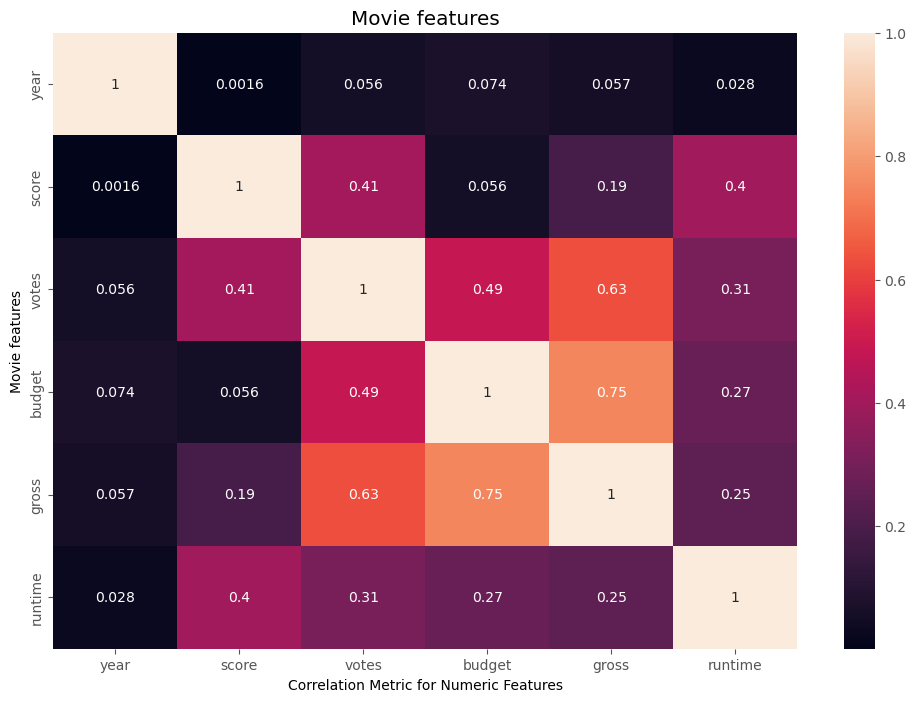

In [98]:
# Correlation matrix heatmap

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.xlabel('Correlation Metric for Numeric Features')
plt.ylabel('Movie features')
plt.title('Movie features')
plt.show()

In [ ]:
# looks at company

df.head()

In [146]:
# Converting categorical variables to numerical codes

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


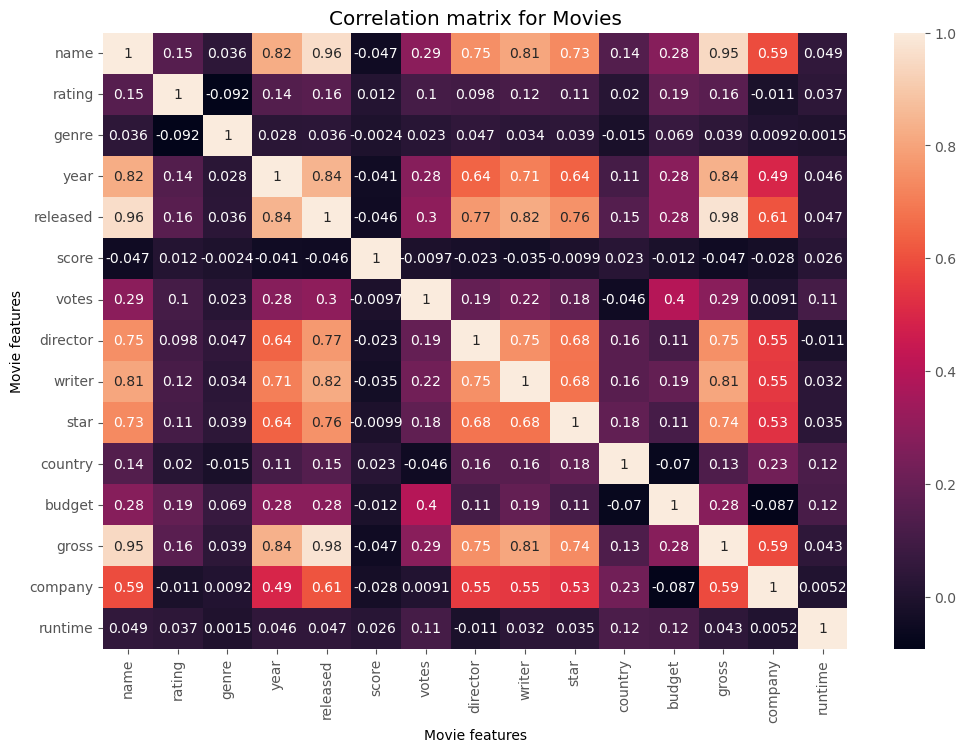

In [147]:
# Correlation matrix of movie features

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [154]:
# Pearson correlation matrix of encoded Movie Features 

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


In [156]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs.head())



name  name        1.000000
      rating      0.154269
      genre       0.036367
      year        0.824034
      released    0.959855
dtype: float64


In [150]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs.head())

genre    rating    -0.091898
rating   genre     -0.091898
budget   company   -0.087490
company  budget    -0.087490
country  budget    -0.069766
dtype: float64


In [151]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


company   star        0.527363
star      company     0.527363
company   writer      0.547126
writer    company     0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587945
gross     company     0.587945
company   name        0.591834
name      company     0.591834
company   released    0.607607
released  company     0.607607
star      year        0.639403
year      star        0.639403
          director    0.643187
director  year        0.643187
star      writer      0.676284
writer    star        0.676284
director  star        0.682358
star      director    0.682358
year      writer      0.709374
writer    year        0.709374
name      star        0.731509
star      name        0.731509
          gross       0.735844
gross     star        0.735844
director  name        0.745905
name      director    0.745905
writer    director    0.748875
director  writer      0.748875
gross     director    0.751149
director  gross       0.751149
released

In [ ]:
# Variables such as "gross" (revenue) exhibit strong positive correlations with "star," "director," and "released" (release date).
# The variable "name" (movie title) demonstrates significant correlations with "gross," "director," and "released." 

In [131]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [143]:
# the Year with the highest gross revenue for each company

CompanyGrossSum = df.groupby(['company', 'year']).sum().reset_index()

idx = CompanyGrossSum.groupby('company')['gross'].idxmax()
top_years = CompanyGrossSum.loc[idx, ['company', 'year', 'gross']]

top_years.rename(columns={'gross': 'gross revenue'}, inplace=True)
top_years = top_years.sort_values('gross revenue', ascending=False)

print(top_years)


C:\Users\adria\AppData\Local\Temp\ipykernel_13512\2491973729.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CompanyGrossSum = df.groupby(['company', 'year']).sum().reset_index()


                                                company  year  gross revenue
4392                               Walt Disney Pictures  2019     5773131804
2863                                     Marvel Studios  2018     4018631866
4287                                 Universal Pictures  2015     3834354888
4179                              Twentieth Century Fox  2009     3793491246
3342                                 Paramount Pictures  2011     3565705182
4428                                       Warner Bros.  2010     3300479986
1265                                  Columbia Pictures  2019     2932757449
2946                          Metro-Goldwyn-Mayer (MGM)  2012     2125573067
2749                                          Lucasfilm  2015     2069521700
3113                                    New Line Cinema  2003     1886749246
1550                               DreamWorks Animation  2010     1569366103
1570                                Dreamworks Pictures  2007     1492450130

In [152]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
